In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [2]:
df = pd.read_csv('titanic/train.csv')

In [3]:
df.drop(['PassengerId','Name','Ticket','Cabin','Embarked'], inplace=True, axis=1)
df.Sex = df.Sex.replace(['male', 'female'], [0, 1])
df.Age = df.Age.fillna(df.Age.median())

In [4]:
X = df.drop('Survived', axis=1)
y = df['Survived']

In [5]:
seed = 7
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

LR: 0.791248 (0.047706)
LDA: 0.790150 (0.043961)
KNN: 0.714869 (0.072687)
CART: 0.792372 (0.035590)
NB: 0.782247 (0.045640)
SVM: 0.674419 (0.057047)


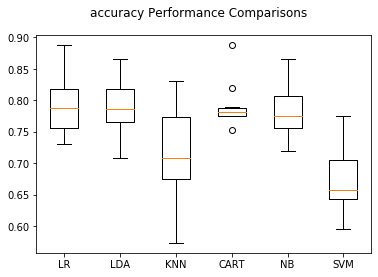

LR: 0.721147 (0.049063)
LDA: 0.713466 (0.047461)
KNN: 0.617487 (0.073368)
CART: 0.738678 (0.047283)
NB: 0.709784 (0.059084)
SVM: 0.408626 (0.072928)


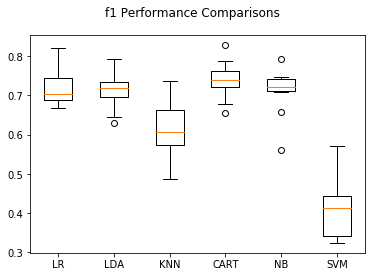

LR: 0.741696 (0.073317)
LDA: 0.746347 (0.058160)
KNN: 0.639256 (0.078859)
CART: 0.743428 (0.084759)
NB: 0.722603 (0.081455)
SVM: 0.685899 (0.119339)


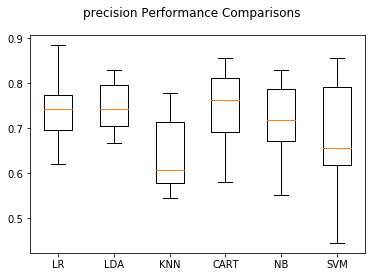

LR: 0.706942 (0.057435)
LDA: 0.686930 (0.062227)
KNN: 0.604030 (0.090553)
CART: 0.728039 (0.044572)
NB: 0.701309 (0.059530)
SVM: 0.298763 (0.068720)


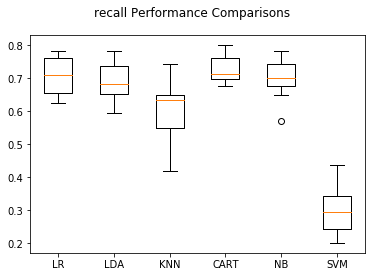

In [7]:
score_list = ['accuracy', 'f1','precision','recall']
for scoring in score_list:
    results = []
    names = []
    for name, model in models:
        kfold = model_selection.KFold(n_splits = 10, random_state = seed, shuffle=True)
        cv_results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)
    fig = plt.figure()
    fig.suptitle("%s Performance Comparisons" % (scoring))
    ax = fig.add_subplot(111)
    plt.boxplot(results)
    ax.set_xticklabels(names)
    plt.show()